In [3]:
import torch
from torch import nn
import numpy as np
from IPython import display

- [[pytorch] [求导练习] 01 sigmoid 函数自动求导练习（autograd，单变量，多变量 multivariables 形式）
](https://www.bilibili.com/video/BV1rW4y1N7ZU/)
- [[手推公式] sigmoid 及其导数 softmax 及其导数性质（从 logits 到 probabilities）](https://www.bilibili.com/video/BV14v4y137Sv/)
- [【python 数学编程】SymPy 数学家的朋友 | hessian | Jacobian
](https://www.bilibili.com/video/BV1si4y1U7xQ/)

## 1. softmax  计算

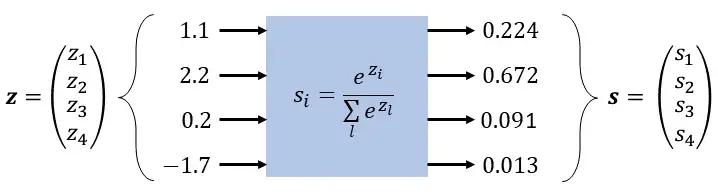

In [4]:
display.Image("./imgs/softmax_case.png")

In [5]:
from math import exp

In [32]:
print(exp(1.1) / (exp(1.1) + exp(2.2) + exp(0.2) + exp(-1.7)))
print(exp(2.2) / (exp(1.1) + exp(2.2) + exp(0.2) + exp(-1.7)))
print(exp(0.2) / (exp(1.1) + exp(2.2) + exp(0.2) + exp(-1.7)))
print(exp(-1.7) / (exp(1.1) + exp(2.2) + exp(0.2) + exp(-1.7)))

0.22363631207948945
0.6718406104698835
0.09092373930780046
0.013599338142826541


In [33]:
def softmax(vector):
    e = np.exp(vector)
    return e / e.sum()

In [34]:
logits = np.asarray([1.1, 2.2, 0.2, -1.7])
softmax(logits)

array([0.22363631, 0.67184061, 0.09092374, 0.01359934])

In [35]:
from scipy.special import softmax
softmax(logits)

array([0.22363631, 0.67184061, 0.09092374, 0.01359934])

In [36]:
logits = torch.tensor([1.1, 2.2, 0.2, -1.7])
nn.Softmax(dim=0)(logits)

tensor([0.2236, 0.6718, 0.0909, 0.0136])

### 1.1 特点

- softmax：任意的数值列表转换为概率分布
    - 通过 exp 转换为正值，转换后的 value > 0，$1 > s_i > 0$；
    - 归一化为概率分布，加和为 1，$\sum_i s_i=1$；
- “保序”
    - -1.7 < 0.2 < 1.1 < 2.2
    - 0.013 < 0.091 < 0.224 < 0.672

## 2. softmax grad


$$
s(z_i)=\frac{e^{z_i}}{\sum_{j=1}^ne^{z_j}}
$$
- softmax vs sigmoid
    - sigmoid: $\mathbb R \rightarrow \mathbb R$
        - $f(z)=\frac{1}{1+\exp(-z)}$
    - softmax: $\mathbb R^n \rightarrow \mathbb R^n$
        - $s_1=s(z_1)=\frac{e^{z_1}}{\sum_{j=1}^ne^{z_j}}$
        - $s_2=s(z_2)=\frac{e^{z_2}}{\sum_{j=1}^ne^{z_j}}$


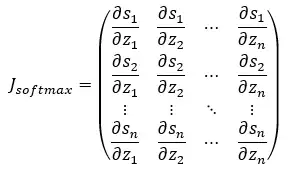

In [21]:
display.Image('./imgs/jacobian.png')

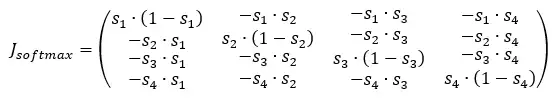

In [22]:
display.Image('./imgs/jacobian_4*4.png')

In [37]:
logits = torch.tensor([1.1, 2.2, 0.2, -1.7])
print(logits.softmax(dim=0))
print(nn.Softmax(dim=0)(logits))

tensor([0.2236, 0.6718, 0.0909, 0.0136])
tensor([0.2236, 0.6718, 0.0909, 0.0136])


## 3. autograd

In [38]:
z = torch.tensor([1.1, 2.2, .2, -1.7], requires_grad=True)
s = z.softmax(dim=0)

In [39]:
s

tensor([0.2236, 0.6718, 0.0909, 0.0136], grad_fn=<SoftmaxBackward0>)

In [41]:
s[0].backward()

In [42]:
z.grad

tensor([ 0.1736, -0.1502, -0.0203, -0.0030])

In [44]:
z = torch.tensor([1.1, 2.2, .2, -1.7], requires_grad=True)
s = z.softmax(dim=0)
s[0].backward()
z.grad

tensor([ 0.1736, -0.1502, -0.0203, -0.0030])

In [45]:
z = torch.tensor([1.1, 2.2, .2, -1.7], requires_grad=True)
s = z.softmax(dim=0)
s[1].backward()
z.grad

tensor([-0.1502,  0.2205, -0.0611, -0.0091])

In [46]:
z = torch.tensor([1.1, 2.2, .2, -1.7], requires_grad=True)
s = z.softmax(dim=0)
s[2].backward()
z.grad

tensor([-0.0203, -0.0611,  0.0827, -0.0012])

In [47]:
z = torch.tensor([1.1, 2.2, .2, -1.7], requires_grad=True)
s = z.softmax(dim=0)
s[3].backward()
z.grad

tensor([-0.0030, -0.0091, -0.0012,  0.0134])

[ 0.1736, -0.1502, -0.0203, -0.0030]\
[-0.1502,  0.2205, -0.0611, -0.0091]\
[-0.0203, -0.0611,  0.0827, -0.0012]\
[-0.0030, -0.0091, -0.0012,  0.0134]

In [48]:
from torch.autograd.functional import jacobian
def softmax(z1, z2, z3, z4):
    exp_z = [torch.exp(z1), torch.exp(z2), torch.exp(z3), torch.exp(z4)]
    return tuple([e/sum(exp_z) for e in exp_z])
z1, z2, z3, z4 = [torch.tensor(1.1), torch.tensor(2.2), torch.tensor(.2), torch.tensor(-1.7)]
jacobian(softmax,(z1,z2,z3, z4))

((tensor(0.1736), tensor(-0.1502), tensor(-0.0203), tensor(-0.0030)),
 (tensor(-0.1502), tensor(0.2205), tensor(-0.0611), tensor(-0.0091)),
 (tensor(-0.0203), tensor(-0.0611), tensor(0.0827), tensor(-0.0012)),
 (tensor(-0.0030), tensor(-0.0091), tensor(-0.0012), tensor(0.0134)))